In [25]:
source("plotfuncs.R")
library(repr)

In [26]:
GRDF    <- read.csv("../Results/Sorted_data.csv")
flschDF <- read.csv("../Results/full_scholfield_model.csv")
nhschDF <- read.csv("../Results/noh_scholfield_model.csv")
nlschDF <- read.csv("../Results/nol_scholfield_model.csv")
cubicDF <- read.csv("../Results/cubic_model.csv") 

## Choose an id

In [27]:
id = 1317

## Plot of logged Trait Value by 1/kT

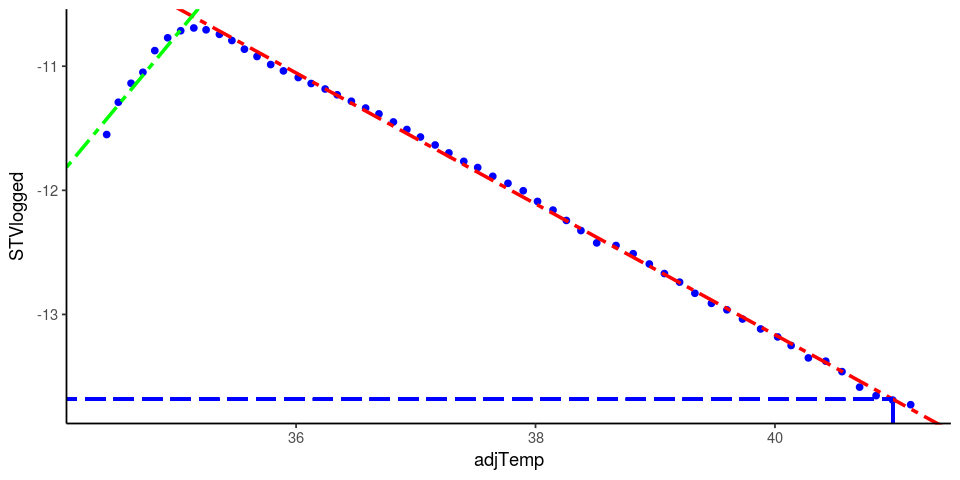

In [28]:
options(repr.plot.width=8, repr.plot.height=4)
KT_plt(id, GRDF)

## Models Plot

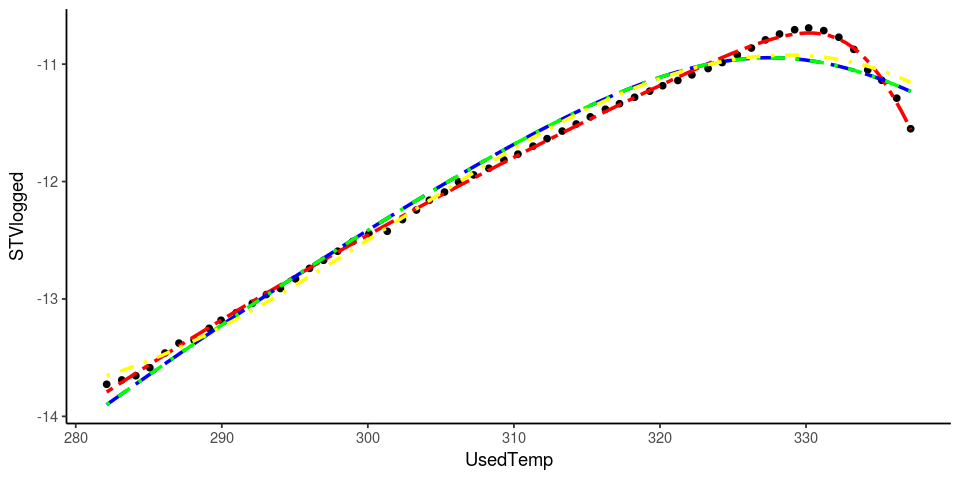

In [29]:
options(repr.plot.width=8, repr.plot.height=4)
models_plot(id, GRDF, flschDF, nhschDF, nlschDF, cubicDF)

In [30]:
sch_tbl(id, flschDF, nhschDF, nlschDF)
cub_tbl(id, cubicDF)



|model |      B0|         E|       Eh|        El|  Th|  Tl|       aic|       bic|    chisqr|
|:-----|-------:|---------:|--------:|---------:|---:|---:|---------:|---------:|---------:|
|Full  | 3.4e-06| 0.6886508| 4.256070| 0.1997259| 330| 260| -394.8642| -382.7121| 0.0391607|
|noh   | 1.0e-06| 0.6079127|       NA| 1.5210651|  NA| 330| -234.0595| -225.9581| 0.7429403|
|nol   | 1.0e-06| 0.6079131| 1.521096|        NA| 330|  NA| -234.0595| -225.9581| 0.7429403|



|model |        a|         b|         c|         d|       aic|       bic|    chisqr|
|:-----|--------:|---------:|---------:|---------:|---------:|---------:|---------:|
|cubic | 964.7106| -9.875623| 0.0329987| -3.65e-05| -245.6975| -237.5961| 0.6035296|